## Search

### Search an unsorted list: Sequence/Linear Search

In [1]:
def indexOfMin(li):
    """
    Return the index of the minimum item.
    """
    
    # base case 1: list is empty
    if len(li) == 0:
        return None
    
    # other case: iterate all items
    minIndex = 0
    curIndex = 0
    for i in range(len(li)):
        if li[curIndex] < li[minIndex]:
            minIndex = i
        curIndex += 1
    
    # return
    return minIndex

In [2]:
li = [23, 654, 21, 143, 3, 82, 26, 4123]
m = indexOfMin(li)

print("index", m)
print("value", li[m])

index 4
value 3


In [3]:
# Question: Big O?
# Python: min(), why it is much better?
test_li = list(range(100000))

In [4]:
%timeit indexOfMin(test_li)

18.8 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%timeit min(test_li)

2.86 ms ± 47.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
def sequentialSearch(target, li):
    """
    Return the position of the target, if found; otherwise return None
    """
    
    # case: iterate all items
    for i in range(len(li)):
        if li[i] == target:
            return i
        
    # base case: not found
    return None

In [7]:
ret = sequentialSearch(26, li)

print("index", ret)
if ret:
    print("value", li[ret])

index 6
value 26


In [8]:
%timeit sequentialSearch(50000, test_li)

4.82 ms ± 79.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit 50000 in test_li

1.09 ms ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
# Question: best case, worst case, average case?
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheSequentialSearch.html

### Search a sorted list, BinarySearch

In [11]:
def binarySearch(target, li):
    left = 0 # index
    right = len(li) - 1 # index
    
    while left <= right:
        mid = (left + right) // 2
        
        if target == li[mid]:
            return mid
        elif target < li[mid]:
            right = mid - 1
        else: # target > li[mid]:
            left = mid + 1

    # not found
    return None

In [12]:
li = [23, 654, 21, 143, 3, 82, 26, 4123]
li.sort() # in place sort
ret = binarySearch(26, li)

print(li)
print("index", ret)
if ret:
    print("value", li[ret])

[3, 21, 23, 26, 82, 143, 654, 4123]
index 3
value 26


In [13]:
# Question: best case, worst case, average case?
# Big O: O(log2 n)
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBinarySearch.html

### Plot binarySearch 

In [14]:
def binarySearch2(target, li):
    iteration = 0
    
    left = 0 # index
    right = len(li) - 1 # index
    
    while left <= right:
        mid = (left + right) // 2
        
        if target == li[mid]:
            return iteration # return iteration, not T/F
        elif target < li[mid]:
            right = mid - 1
        else: # target > li[mid]:
            left = mid + 1
            
        iteration += 1

    # not found
    return iteration

In [15]:
import random

initProblemSize = 128
li = list(range(initProblemSize))
target = random.randint(0, initProblemSize-1) # randint(a, b) returns a random integer N such that a <= N <= b.

print(target)
print(binarySearch2(target, li))

11
4


In [16]:
import random

# init
initProblemSize = 1000
epoch = 16
x_li = list()
y_li = list()

print("%12s %12s %12s" % ("Problem Size", "Target", "Iteration"))

# before into epoch
problemSize = initProblemSize
for e in range(epoch):
    
    # init for each epoch
    li = list(range(problemSize))
    target = random.randint(0, problemSize-1)
    
    ############
    it = binarySearch2(target, li)
    ############

    x_li.append(problemSize)
    y_li.append(it)
    print("%12d %12d %12d" % (problemSize, target, it))
    
    # for next epoch
    problemSize *= 2

Problem Size       Target    Iteration
        1000          688            9
        2000          701            6
        4000         2659           11
        8000         5159           12
       16000         7692           13
       32000        29285           13
       64000        50113           15
      128000        66266           15
      256000       239425           17
      512000       411590           17
     1024000       132883           18
     2048000       128804           20
     4096000      3852474           21
     8192000       388499           13
    16384000      5701515           23
    32768000     31120569           24


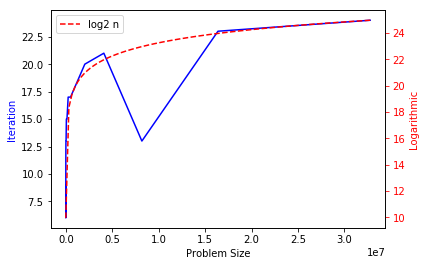

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
ax1.plot(x_li, y_li, 'b-', label='Iteration')
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Iteration', color='b')
ax1.tick_params('s', colors='b')

ax2 = ax1.twinx()
x = np.linspace(initProblemSize, problemSize/2.0, 100) # hack
ax2.plot(x, np.log2(x), 'r--', label='log2 n')
ax2.set_ylabel('Logarithmic', color='r')
ax2.tick_params('y', colors='r')
ax2.legend()

plt.show()